In [46]:
!pip install sklearn

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [11]:
data = pd.read_csv('../DATA/Airbnb_Open_Data.csv', low_memory=False)

In [12]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# Dealing with missing data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [14]:
data.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [15]:
data.isnull().sum()/data.shape[0] * 100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

In [16]:
data.duplicated().sum()

541

In [17]:
data = data.drop_duplicates()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

In [19]:
data.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [20]:
data = data.drop(columns={'country', 'country code', 'host name',
                          'id', 'host id', 'license', 'NAME',
                          'house_rules'})

In [21]:
data.shape

(102058, 18)

In [22]:
data.loc[data['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group' ] = 'Brooklyn'

In [23]:
data.loc[data['neighbourhood'] == 'Concourse Village', 'neighbourhood'] = 'Concourse'
data.loc[data['neighbourhood'] == 'Jamaica Estates', 'neighbourhood'] = 'Jamaica'
data.loc[data['neighbourhood'] == 'Jamaica Hills', 'neighbourhood'] = 'Jamaica'
data.loc[data['neighbourhood'] == 'Kew Gardens Hills', 'neighbourhood'] = 'Kew Gardens'

In [24]:
data['neighbourhood group'] = data[['neighbourhood group']].fillna('Manhattan')

In [25]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.replace(' ', '')


In [26]:
pr_mean = data.loc[pd.notna(data['price']), 'price'].values.astype(int).mean()
data['price'] = data[['price']].fillna(pr_mean) 
data['price'] = data['price'].astype(int)

In [27]:
data['service fee'] = data['service fee'].str.replace('$', '')
data['service fee'] = data['service fee'].str.replace(',', '')
data['service fee'] = data['service fee'].str.replace(' ', '')

In [28]:
sf_mean = data.loc[pd.notna(data['service fee']), 'service fee'].values.astype(int).mean()
data['service fee'] = data[['service fee']].fillna(sf_mean) 
data['service fee'] = data['service fee'].astype(int)

In [29]:
data['number of reviews'] = data[['number of reviews']].fillna(data['number of reviews'].median()) 
data['reviews per month'] = data[['reviews per month']].fillna(data['reviews per month'].median())
data['review rate number'] = data[['review rate number']].fillna(data['review rate number'].median())
data['Construction year'] = data[['Construction year']].fillna(data['Construction year'].median())
data['minimum nights'] = data[['minimum nights']].fillna(data['minimum nights'][(data['minimum nights']>0) & (data['minimum nights']<50)].median())
data['calculated host listings count'] = data[['calculated host listings count']].fillna(data['calculated host listings count'].median()) 

In [30]:
data = data.dropna()

In [31]:
data.isnull().sum()/data.shape[0] * 100

host_identity_verified            0.0
neighbourhood group               0.0
neighbourhood                     0.0
lat                               0.0
long                              0.0
instant_bookable                  0.0
cancellation_policy               0.0
room type                         0.0
Construction year                 0.0
price                             0.0
service fee                       0.0
minimum nights                    0.0
number of reviews                 0.0
last review                       0.0
reviews per month                 0.0
review rate number                0.0
calculated host listings count    0.0
availability 365                  0.0
dtype: float64

# Outlier Ditection

In [32]:
data['last review'] = pd.to_datetime(data['last review'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85707 entries, 0 to 102057
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_identity_verified          85707 non-null  object        
 1   neighbourhood group             85707 non-null  object        
 2   neighbourhood                   85707 non-null  object        
 3   lat                             85707 non-null  float64       
 4   long                            85707 non-null  float64       
 5   instant_bookable                85707 non-null  object        
 6   cancellation_policy             85707 non-null  object        
 7   room type                       85707 non-null  object        
 8   Construction year               85707 non-null  float64       
 9   price                           85707 non-null  int64         
 10  service fee                     85707 non-null  int64         
 11  m

In [34]:
data = data[data['minimum nights']>0]

Q1 = data['minimum nights'].quantile(0.25)
Q3 = data['minimum nights'].quantile(0.75)
iqr = Q3 - Q1
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr

data = data[(data['minimum nights']>=lower) & (data['minimum nights']<=upper)]

In [35]:
data = data[data['availability 365'] >= 0]

In [36]:
z = (data['price'] - data['price'].mean())/data['price'].std()
data = data[(z>-3) & (z<3)]

z = (data['service fee'] - data['service fee'].mean())/data['service fee'].std()
data = data[(z>-3) & (z<3)]

z = (data['long'] - data['long'].mean())/data['long'].std()
data = data[(z>-3) & (z<3)]

z = (data['lat'] - data['lat'].mean())/data['lat'].std()
data = data[(z>-3) & (z<3)]

In [37]:
data.shape

(69468, 18)

# Preprocessing

In [38]:
data.dtypes

host_identity_verified                    object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                      int64
service fee                                int64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
dtype: object

In [39]:
data.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000,69468.000000
mean,40.727608,-73.950643,2012.513028,626.534145,125.275105,2.603861,34.342777,1.518168,3.268872,4.650472,134.528229
std,0.056335,0.042173,5.760903,331.129562,66.214989,1.618918,53.162959,1.810106,1.285999,25.078464,132.754644
min,40.565680,-74.100920,2003.000000,50.000000,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000
25%,40.687627,-73.981910,2008.000000,342.000000,68.000000,1.000000,4.000000,0.260000,2.000000,1.000000,4.000000
50%,40.720800,-73.953430,2012.000000,625.000000,125.000000,2.000000,13.000000,0.940000,3.000000,1.000000,89.000000
75%,40.762720,-73.931620,2018.000000,913.000000,183.000000,3.000000,42.000000,2.280000,4.000000,2.000000,252.000000
max,40.897530,-73.792410,2022.000000,1200.000000,240.000000,9.000000,1024.000000,90.000000,5.000000,327.000000,3677.000000


In [40]:
!pip install scikit-learn

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
ss = StandardScaler(with_mean=False, with_std=True)

ss_df = pd.DataFrame(ss.fit_transform(data[['price', 'service fee', 'lat']]), 
                    columns=['price', 'service fee', 'lat'])

ss_df.describe()

,price,service fee,lat
count,69468.000000,69468.000000,69468.000000
mean,1.892125,1.891958,722.959997
std,1.000007,1.000007,1.000007
min,0.150999,0.151024,720.085595
25%,1.032836,1.026965,722.250298
50%,1.887492,1.887804,722.839146
75%,2.757249,2.763745,723.583273
max,3.623985,3.624583,725.976299


In [43]:
from sklearn.preprocessing import MaxAbsScaler

In [44]:
mas_df = pd.DataFrame(MaxAbsScaler().fit_transform(data[['long', 'price', 'minimum nights']]),
                    columns=['long', 'price', 'minimum nights'])
mas_df.describe()

,long,price,minimum nights
count,69468.000000,69468.000000,69468.000000
mean,-0.997972,0.522112,0.289318
std,0.000569,0.275941,0.179880
min,-1.000000,0.041667,0.111111
25%,-0.998394,0.285000,0.111111
50%,-0.998010,0.520833,0.222222
75%,-0.997715,0.760833,0.333333
max,-0.995837,1.000000,1.000000


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mms_df = pd.DataFrame(MinMaxScaler(feature_range=(-1, 1)).fit_transform(data[['long', 'price', 'minimum nights']]),
                    columns=['long', 'price', 'minimum nights'])
mms_df.describe()

,long,price,minimum nights
count,69468.000000,69468.000000,69468.000000
mean,-0.025788,0.002668,-0.599035
std,0.273395,0.575877,0.404729
min,-1.000000,-1.000000,-1.000000
25%,-0.228485,-0.492174,-1.000000
50%,-0.043856,0.000000,-0.750000
75%,0.097533,0.500870,-0.500000
max,1.000000,1.000000,1.000000


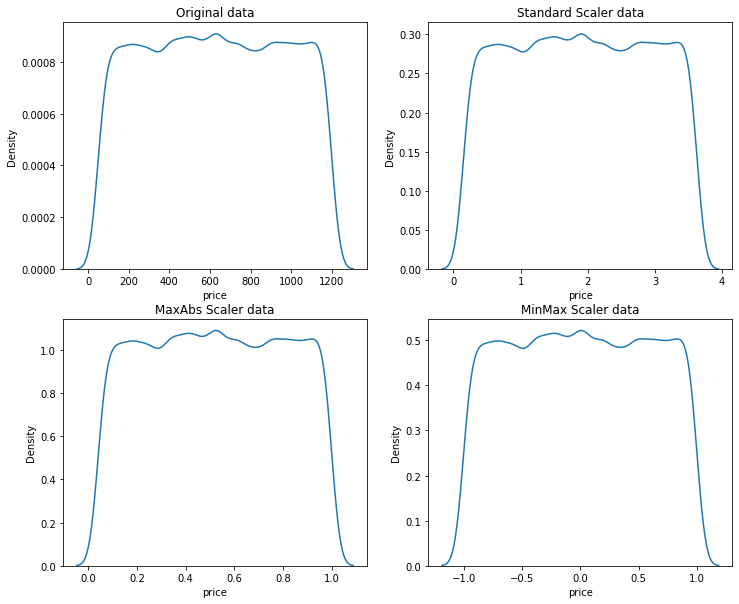

In [47]:
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.title('Original data');
sns.kdeplot(x='price', data=data);

plt.subplot(222)
plt.title('Standard Scaler data');
sns.kdeplot(x='price', data=ss_df)

plt.subplot(223)
plt.title('MaxAbs Scaler data');
sns.kdeplot(x='price', data=mas_df);

plt.subplot(224)
plt.title('MinMax Scaler data');
sns.kdeplot(x='price', data=mms_df);

In [48]:
from sklearn.preprocessing import normalize

In [49]:
norm_df = pd.DataFrame(normalize(data[['price', 'service fee']], axis=1), # axis = 1 meaning col  
                       columns=['price', 'service fee'])

In [50]:
norm_df.describe()

,price,service fee
count,69468.000000,69468.000000
mean,0.980504,0.196201
std,0.004878,0.009655
min,0.455738,0.015998
25%,0.980507,0.195743
50%,0.980581,0.196116
75%,0.980655,0.196483
max,0.999872,0.890114


In [51]:
data

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
5,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
8,verified,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,2005.0,1018,204,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0
9,unconfirmed,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,2015.0,291,58,2.0,118.0,2017-07-21,0.99,5.0,1.0,375.0
10,verified,Manhattan,Chinatown,40.71344,-73.99037,False,flexible,Entire home/apt,2004.0,319,64,1.0,160.0,2019-06-09,1.33,3.0,4.0,1.0
11,verified,Manhattan,Upper West Side,40.80316,-73.96545,True,flexible,Entire home/apt,2008.0,606,121,5.0,53.0,2019-06-22,0.43,4.0,1.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102052,unconfirmed,Manhattan,Inwood,40.86857,-73.91577,True,flexible,Private room,2012.0,1183,125,4.0,95.0,2019-07-01,3.65,2.0,1.0,323.0
102053,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,2012.0,696,125,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0
102054,verified,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,2012.0,909,125,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0
102055,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,2012.0,387,125,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0


In [52]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [53]:
data.nunique()

host_identity_verified                2
neighbourhood group                   5
neighbourhood                       173
lat                               18964
long                              14739
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum nights                        9
number of reviews                   454
last review                        2287
reviews per month                   982
review rate number                    5
calculated host listings count       54
availability 365                    428
dtype: int64

In [54]:
data['host_identity_verified'] = OrdinalEncoder(categories=[['unconfirmed', 'verified']]).fit_transform(data[['host_identity_verified']])
data['instant_bookable'] = OrdinalEncoder(categories=[[False, True]]).fit_transform(data[['instant_bookable']])

In [55]:
ng_le = LabelEncoder()
data['neighbourhood group'] = ng_le.fit_transform(data['neighbourhood group'])

nb_le = LabelEncoder()
data['neighbourhood'] = nb_le.fit_transform(data['neighbourhood'])

cp_le = LabelEncoder()
data['cancellation_policy'] = cp_le.fit_transform(data['cancellation_policy'])

rt_le = LabelEncoder()
data['room type'] = rt_le.fit_transform(data['room type'])

In [56]:
data.dtypes

host_identity_verified                   float64
neighbourhood group                        int64
neighbourhood                              int64
lat                                      float64
long                                     float64
instant_bookable                         float64
cancellation_policy                        int64
room type                                  int64
Construction year                        float64
price                                      int64
service fee                                int64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
dtype: object

In [57]:
data["neighbourhood group"]

5         2
8         2
9         2
10        2
11        2
         ..
102052    2
102053    1
102054    1
102055    1
102057    2
Name: neighbourhood group, Length: 69468, dtype: int64